In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset 
data2 = pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
# Displaying First 5 Rows
data2.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
# Displaying Last 5 Rows
data2.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [5]:
# Dataset Size
data2.shape

(729322, 11)

In [6]:
data2.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


    Our target variable is trip duration variable (Dependent Variable). Keeping it in mind lets start our EDA and make a suitable dataset for our models.

In [7]:
# Checking for null values
data2.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

No Null values present

In [8]:
data2.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [9]:
# Usung 30% of Data
#data = data2.sample(frac = 0.3, random_state = 0, replace = True)

In [10]:
#data.shape

In [11]:
data = data2

In [12]:
data.shape

(729322, 11)

Text(0, 0.5, 'Frequency')

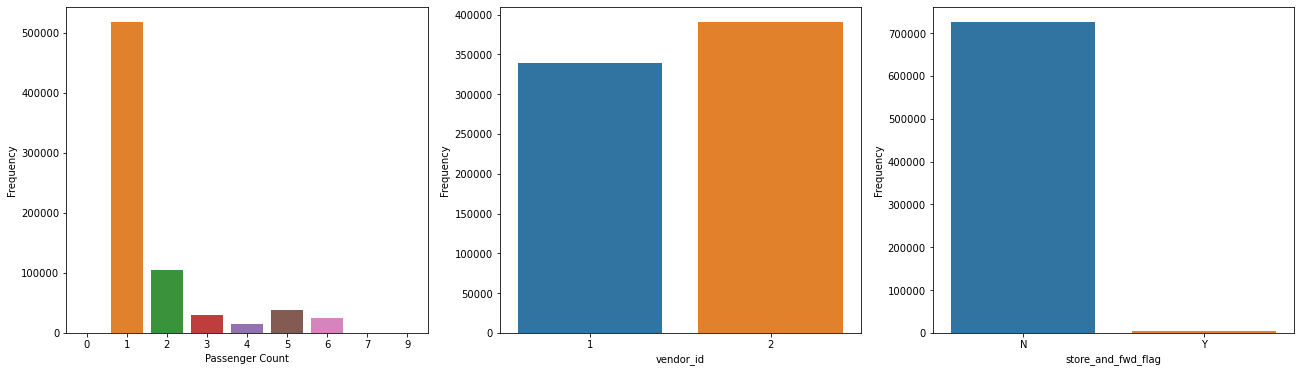

In [13]:
# Binary Features
plt.figure(figsize=(22, 6))
#fig, axs = plt.subplot(ncols=2)

# Passenger Count
plt.subplot(131)
sns.countplot(data['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')


# vendor_id
plt.subplot(132)
sns.countplot(data['vendor_id'])
plt.xlabel('vendor_id')
plt.ylabel('Frequency')

# store_and_fwd_flag
plt.subplot(133)
sns.countplot(data['store_and_fwd_flag'])
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frequency')

In [14]:
from datetime import timedelta
import datetime as dt

In [15]:
# Convert timestamp to datetime format to fetch the other details as listed below

data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [16]:
# Using datetime to create new columns - day_name, day_number, month, pickup_hour
data['day_name'] = data.pickup_datetime.dt.day_name
data['month'] = data.pickup_datetime.dt.month
data['day_number'] = data.pickup_datetime.dt.weekday
data['pickup_hour'] = data.pickup_datetime.dt.hour  

In [17]:
# Converting day_number, month, pickup_hour to category

data['month'] = data['month'].astype('category')
data['day_number'] = data['day_number'].astype('category')
data['pickup_hour'] = data['pickup_hour'].astype('category')

In [18]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
day_name                      object
month                       category
day_number                  category
pickup_hour                 category
dtype: object

In [19]:
# Considering only upto 6 passenger count to prevent any of the outlier

data = data[(data['passenger_count'] <= 6) & (data['passenger_count'] > 0)]

Text(0, 0.5, 'Frequency')

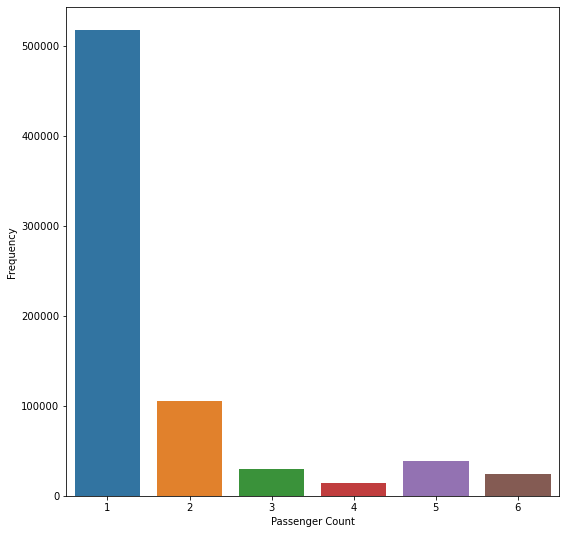

In [20]:
# Binary Features
plt.figure(figsize=(30, 9),facecolor='w', edgecolor='b')

#fig, axs = plt.subplot(ncols=2)

# Passenger Count
plt.subplot(131)
sns.countplot(data['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')

In [21]:
# Importing geopy which can be used for distance calculation

import geopy.distance

In [22]:
def calc_dist(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    dropoff = (df['dropoff_latitude'], df['dropoff_longitude'])
    return geopy.distance.distance(pickup, dropoff).km

In [23]:
# Adding the distance column in our dataframe

data['distance'] = data.apply(lambda x: calc_dist(x), axis=1)

In [24]:
data['speed'] = (data.distance/(data.trip_duration/3600))

### Plotting distribution of trip duration and distance for checking outliers

Text(0.5, 1.0, 'Distribution of trip duration')

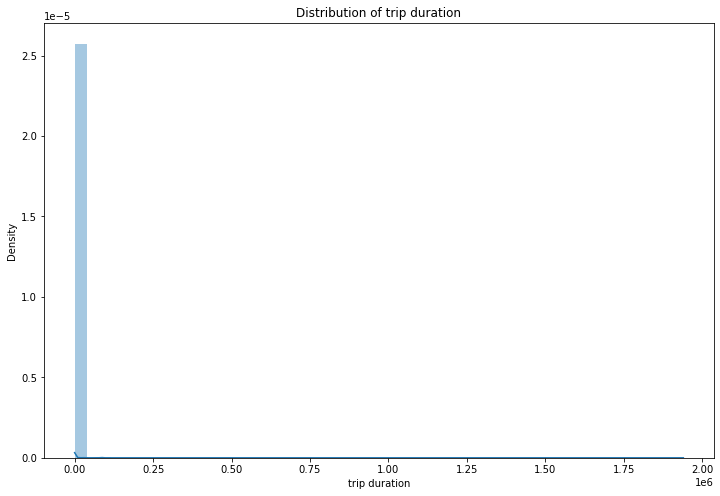

In [25]:
#Plotting distribution of trip duration and distance for checking outliers.

plt.figure(figsize=(12, 8))
sns.distplot(data['trip_duration'])
plt.xlabel('trip duration')
plt.title('Distribution of trip duration')

Text(0.5, 1.0, 'Distribution of distance')

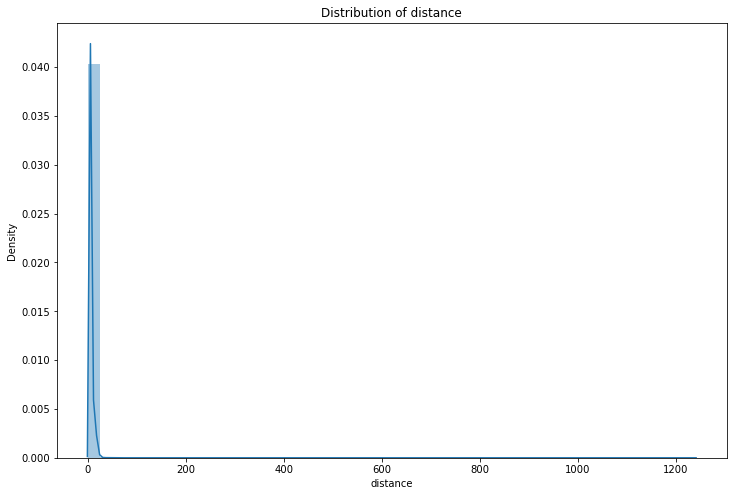

In [26]:
plt.figure(figsize=(12, 8))
sns.distplot(data['distance'])
plt.xlabel('distance')
plt.title('Distribution of distance')

We have to remove the potential outliers from distance and trip duration. Here, wehave chosen the trip duration part normally greater than 10 seconds and less than 0.5day.

## Removing Outliers

In [27]:
# Removing potential distance outlier

data = data[(data['distance'] < data['distance'].quantile(0.95)) & (data['distance'] > data['distance'].quantile(0.05))]

# Removing potential trip duration outlier

data = data[(data['trip_duration'] < 3*3600) & (data['trip_duration'] > 10)]
data = data[(data['trip_duration'] < data['trip_duration'].quantile(0.95)) & (data['trip_duration'] > data['trip_duration'].quantile(0.05))]


In [28]:
data.drop(['id'] , axis = 1 , inplace = True)

In [29]:
# Converting all the categorical variables to numerical
    
dummy = pd.get_dummies(data.store_and_fwd_flag, prefix = 'flag')
data = pd.concat([data, dummy], axis =1)

dummy = pd.get_dummies(data.vendor_id, prefix = 'vendor_id')
data = pd.concat([data, dummy], axis =1)

dummy = pd.get_dummies(data.month, prefix = 'month')
data = pd.concat([data, dummy], axis = 1)

dummy = pd.get_dummies(data.day_number, prefix = 'day_number')
data = pd.concat([data,dummy], axis = 1)

dummy = pd.get_dummies(data.pickup_hour, prefix = 'pickup_hour')
data = pd.concat([data, dummy], axis = 1)

In [30]:
pd.set_option('display.max_columns', None)

In [31]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_name,month,day_number,pickup_hour,distance,speed,flag_N,flag_Y,vendor_id_1,vendor_id_2,month_1,month_2,month_3,month_4,month_5,month_6,day_number_0,day_number_1,day_number_2,day_number_3,day_number_4,day_number_5,day_number_6,pickup_hour_0,pickup_hour_1,pickup_hour_2,pickup_hour_3,pickup_hour_4,pickup_hour_5,pickup_hour_6,pickup_hour_7,pickup_hour_8,pickup_hour_9,pickup_hour_10,pickup_hour_11,pickup_hour_12,pickup_hour_13,pickup_hour_14,pickup_hour_15,pickup_hour_16,pickup_hour_17,pickup_hour_18,pickup_hour_19,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,<bound method PandasDelegate._add_delegate_acc...,2,0,16,1.199770,10.797929,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,<bound method PandasDelegate._add_delegate_acc...,3,4,23,4.123945,13.496548,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,<bound method PandasDelegate._add_delegate_acc...,2,6,17,7.250436,15.964262,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,<bound method PandasDelegate._add_delegate_acc...,1,1,9,2.358287,7.440694,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,<bound method PandasDelegate._add_delegate_acc...,2,2,6,4.328155,18.374244,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
data.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'day_name',
       'month', 'day_number', 'pickup_hour', 'distance', 'speed', 'flag_N',
       'flag_Y', 'vendor_id_1', 'vendor_id_2', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'day_number_0', 'day_number_1',
       'day_number_2', 'day_number_3', 'day_number_4', 'day_number_5',
       'day_number_6', 'pickup_hour_0', 'pickup_hour_1', 'pickup_hour_2',
       'pickup_hour_3', 'pickup_hour_4', 'pickup_hour_5', 'pickup_hour_6',
       'pickup_hour_7', 'pickup_hour_8', 'pickup_hour_9', 'pickup_hour_10',
       'pickup_hour_11', 'pickup_hour_12', 'pickup_hour_13', 'pickup_hour_14',
       'pickup_hour_15', 'pickup_hour_16', 'pickup_hour_17', 'pickup_hour_18',
       'pickup_hour_19', 'pickup_hour_20', 'pickup_hour_21', 'pickup_hour_22',
       'pickup_h

In [33]:
data.shape

(589827, 57)

In [34]:
data.dtypes

vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
day_name                      object
month                       category
day_number                  category
pickup_hour                 category
distance                     float64
speed                        float64
flag_N                         uint8
flag_Y                         uint8
vendor_id_1                    uint8
vendor_id_2                    uint8
month_1                        uint8
month_2                        uint8
month_3                        uint8
month_4                        uint8
month_5                        uint8
month_6                        uint8
day_number_0                   uint8
d

In [35]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_name,month,day_number,pickup_hour,distance,speed,flag_N,flag_Y,vendor_id_1,vendor_id_2,month_1,month_2,month_3,month_4,month_5,month_6,day_number_0,day_number_1,day_number_2,day_number_3,day_number_4,day_number_5,day_number_6,pickup_hour_0,pickup_hour_1,pickup_hour_2,pickup_hour_3,pickup_hour_4,pickup_hour_5,pickup_hour_6,pickup_hour_7,pickup_hour_8,pickup_hour_9,pickup_hour_10,pickup_hour_11,pickup_hour_12,pickup_hour_13,pickup_hour_14,pickup_hour_15,pickup_hour_16,pickup_hour_17,pickup_hour_18,pickup_hour_19,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,<bound method PandasDelegate._add_delegate_acc...,2,0,16,1.199770,10.797929,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,<bound method PandasDelegate._add_delegate_acc...,3,4,23,4.123945,13.496548,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,<bound method PandasDelegate._add_delegate_acc...,2,6,17,7.250436,15.964262,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,<bound method PandasDelegate._add_delegate_acc...,1,1,9,2.358287,7.440694,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,<bound method PandasDelegate._add_delegate_acc...,2,2,6,4.328155,18.374244,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
# Droping out the unwanted columns 

data.drop(['day_name','vendor_id' , 'pickup_datetime' , 'dropoff_datetime' , 'store_and_fwd_flag','pickup_hour','day_number','month'] , axis = 1 , inplace = True)

In [37]:
data.columns

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'distance',
       'speed', 'flag_N', 'flag_Y', 'vendor_id_1', 'vendor_id_2', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'day_number_0',
       'day_number_1', 'day_number_2', 'day_number_3', 'day_number_4',
       'day_number_5', 'day_number_6', 'pickup_hour_0', 'pickup_hour_1',
       'pickup_hour_2', 'pickup_hour_3', 'pickup_hour_4', 'pickup_hour_5',
       'pickup_hour_6', 'pickup_hour_7', 'pickup_hour_8', 'pickup_hour_9',
       'pickup_hour_10', 'pickup_hour_11', 'pickup_hour_12', 'pickup_hour_13',
       'pickup_hour_14', 'pickup_hour_15', 'pickup_hour_16', 'pickup_hour_17',
       'pickup_hour_18', 'pickup_hour_19', 'pickup_hour_20', 'pickup_hour_21',
       'pickup_hour_22', 'pickup_hour_23'],
      dtype='object')

In [38]:
data.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,speed,flag_N,flag_Y,vendor_id_1,vendor_id_2,month_1,month_2,month_3,month_4,month_5,month_6,day_number_0,day_number_1,day_number_2,day_number_3,day_number_4,day_number_5,day_number_6,pickup_hour_0,pickup_hour_1,pickup_hour_2,pickup_hour_3,pickup_hour_4,pickup_hour_5,pickup_hour_6,pickup_hour_7,pickup_hour_8,pickup_hour_9,pickup_hour_10,pickup_hour_11,pickup_hour_12,pickup_hour_13,pickup_hour_14,pickup_hour_15,pickup_hour_16,pickup_hour_17,pickup_hour_18,pickup_hour_19,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23
0,1,-73.953918,40.778873,-73.963875,40.771164,400,1.199770,10.797929,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,-73.988312,40.731743,-73.994751,40.694931,1100,4.123945,13.496548,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,-73.997314,40.721458,-73.948029,40.774918,1635,7.250436,15.964262,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,6,-73.961670,40.759720,-73.956779,40.780628,1141,2.358287,7.440694,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,-74.017120,40.708469,-73.988182,40.740631,848,4.328155,18.374244,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
data.dtypes

passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
distance             float64
speed                float64
flag_N                 uint8
flag_Y                 uint8
vendor_id_1            uint8
vendor_id_2            uint8
month_1                uint8
month_2                uint8
month_3                uint8
month_4                uint8
month_5                uint8
month_6                uint8
day_number_0           uint8
day_number_1           uint8
day_number_2           uint8
day_number_3           uint8
day_number_4           uint8
day_number_5           uint8
day_number_6           uint8
pickup_hour_0          uint8
pickup_hour_1          uint8
pickup_hour_2          uint8
pickup_hour_3          uint8
pickup_hour_4          uint8
pickup_hour_5          uint8
pickup_hour_6          uint8
pickup_hour_7          uint8
pickup_hour_8          uint8
pickup_hour_9 

# BenchMark Model

In [40]:
from sklearn.utils import shuffle

In [41]:
# Shuffling the Dataset
data = shuffle(data, random_state = 42)

#creating 4 divisions
div = int(data.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]

In [42]:
train.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,speed,flag_N,flag_Y,vendor_id_1,vendor_id_2,month_1,month_2,month_3,month_4,month_5,month_6,day_number_0,day_number_1,day_number_2,day_number_3,day_number_4,day_number_5,day_number_6,pickup_hour_0,pickup_hour_1,pickup_hour_2,pickup_hour_3,pickup_hour_4,pickup_hour_5,pickup_hour_6,pickup_hour_7,pickup_hour_8,pickup_hour_9,pickup_hour_10,pickup_hour_11,pickup_hour_12,pickup_hour_13,pickup_hour_14,pickup_hour_15,pickup_hour_16,pickup_hour_17,pickup_hour_18,pickup_hour_19,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23
498628,1,-73.981995,40.758884,-73.982651,40.771729,419,1.427403,12.264084,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
288589,2,-73.974884,40.790512,-73.969803,40.799870,312,1.124150,12.970963,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
726002,1,-73.992210,40.737881,-74.004585,40.717117,722,2.531682,12.623344,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
171668,1,-74.012665,40.701706,-74.002747,40.734188,905,3.703159,14.730800,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
140184,2,-73.988586,40.777870,-73.982155,40.770100,360,1.019526,10.195265,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
test.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,speed,flag_N,flag_Y,vendor_id_1,vendor_id_2,month_1,month_2,month_3,month_4,month_5,month_6,day_number_0,day_number_1,day_number_2,day_number_3,day_number_4,day_number_5,day_number_6,pickup_hour_0,pickup_hour_1,pickup_hour_2,pickup_hour_3,pickup_hour_4,pickup_hour_5,pickup_hour_6,pickup_hour_7,pickup_hour_8,pickup_hour_9,pickup_hour_10,pickup_hour_11,pickup_hour_12,pickup_hour_13,pickup_hour_14,pickup_hour_15,pickup_hour_16,pickup_hour_17,pickup_hour_18,pickup_hour_19,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23
442369,1,-73.988716,40.768974,-74.009560,40.706268,1161,7.182553,22.271482,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
218492,5,-73.945152,40.778797,-73.958534,40.764778,765,1.923542,9.051964,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
578241,1,-73.956009,40.781418,-73.969963,40.757256,699,2.930457,15.092482,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
465822,2,-73.975937,40.789188,-73.983742,40.738228,1469,5.697376,13.962255,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
401876,6,-73.972420,40.759460,-73.983292,40.731548,1289,3.232760,9.028654,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Calculating Mean of trip duration

In [44]:
test['simple_mean'] = train['trip_duration'].mean()

In [45]:
#calculating mean absolute error
from sklearn.metrics import mean_absolute_error as MAE

simple_mean_error = MAE(test['trip_duration'] , test['simple_mean'])
simple_mean_error

303.0333522454909

In [46]:
individual_passenger = pd.pivot_table(train, values='trip_duration', index = ['passenger_count'], aggfunc=np.mean)
individual_passenger

,trip_duration
passenger_count,
1,729.860486
2,744.204186
3,745.634200
4,755.004229
5,734.642226
6,732.259877


In [47]:
# Initializing new column to zero
test['individual_passenger_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['passenger_count'].unique():
  # Assign the mean value corresponding to unique entry
  test['individual_passenger_mean'][test['passenger_count'] == str(i)] = train['trip_duration'][train['passenger_count'] == str(i)].mean()

In [48]:
# calculating mean absolute error

individual_passenger_error = MAE(test['trip_duration'] , test['individual_passenger_mean'] )
individual_passenger_error

735.4208890009243

<BarContainer object of 2 artists>

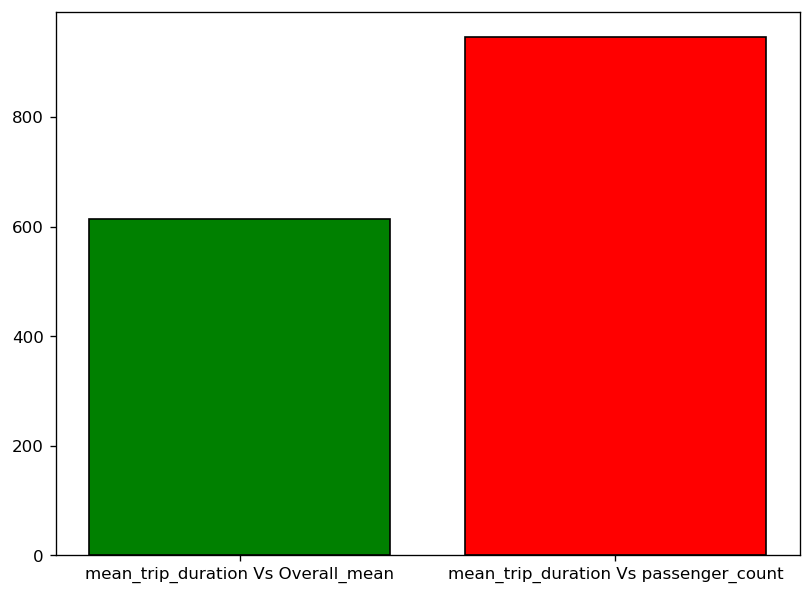

In [49]:
# Camparing Overall mean and mean with specific variable (passenger_count)
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
comparision = ['mean_trip_duration Vs Overall_mean','mean_trip_duration Vs passenger_count']
mean_error = [614.1298112263503,945.3794520418838]

colors = ['green','red']

plt.bar(comparision, mean_error, color = colors, edgecolor= 'black')

    As we can see the mean error increases while comparing with a specific variable, therefore it is better to keep it with Overall mean.

# End Of Bench Mark

# Evalution Metrics

In [50]:
# Creating a raw data copy
data_copy = data

In [51]:
from sklearn.utils import shuffle
# Shuffling the dataset
data_copy = shuffle(data_copy, random_state = 30)

# Creating 4 divisions
div = int(data_copy.shape[0]/4)

# We will divide the 4 division - 3 for training part and 1 for testing
train = data_copy.loc[:3*div+1,:]
test = data_copy.loc[3*div+1:]

### Calculating Mean of trip duration

In [52]:
# storing mean in the test set as a new column
test['mean'] = train['trip_duration'].mean()

# calculating mean absolute error
from sklearn.metrics import mean_absolute_error as MAE
mean_error = MAE(test['trip_duration'], test['mean'])
mean_error

302.9278566742911

    I have taken the most appropriate Evaluation metric for this dataset, ( Mean Absolute Error )because I have used the distance and speed variable concept which is related to time duration also most of the outliers in the data are removed and so mean squared or root mean squared error will not be felt required

# Normalizing Data

In [53]:
# separating independent and dependent variables
x5 = data.drop(['trip_duration'], axis =1)
y5 = data['trip_duration']
x5.shape, y5.shape

((589827, 48), (589827,))

In [54]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x5, test_x5, train_y5, test_y5 = train_test_split(x5, y5, random_state = 65)

In [55]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [56]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x5, train_y5)

LinearRegression()

In [57]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x5)
k = mae(test_predict, test_y5)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     106.21620542212094


In [58]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y5,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
169622,1232,1024.039062,207.960938
481263,611,627.422852,-16.422852
398264,756,781.780273,-25.780273
443465,493,650.708984,-157.708984
519950,371,559.062500,-188.062500


## Checking Whether Data is Normally Distributed ?

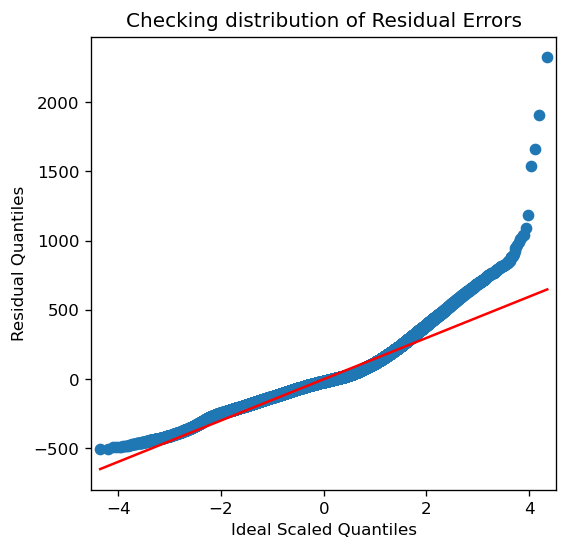

In [59]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

## Variance Inflation Factor (VIF) (Checking for multi collinearity)

In [60]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index =data.columns)
VIF

passenger_count       1.092383
pickup_longitude      1.662510
pickup_latitude       1.850785
dropoff_longitude     1.760446
dropoff_latitude      1.845088
trip_duration         6.086708
distance             10.064711
speed                 5.707403
flag_N                     inf
flag_Y                     inf
vendor_id_1                inf
vendor_id_2                inf
month_1                    inf
month_2                    inf
month_3                    inf
month_4                    inf
month_5                    inf
month_6                    inf
day_number_0               inf
day_number_1               inf
day_number_2               inf
day_number_3               inf
day_number_4               inf
day_number_5               inf
day_number_6               inf
pickup_hour_0              inf
pickup_hour_1              inf
pickup_hour_2              inf
pickup_hour_3              inf
pickup_hour_4              inf
pickup_hour_5              inf
pickup_hour_6              inf
pickup_h

In [61]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x5, train_y5)

LinearRegression(normalize=True)

In [62]:
from sklearn.metrics import mean_absolute_error as mae

In [63]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x5)
k = mae(train_predict, train_y5)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 106.32323196645342


In [64]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x5)
k = mae(test_predict, test_y5)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     106.21030876797981


Text(0.5, 1.0, 'Normalized Coefficient plot')

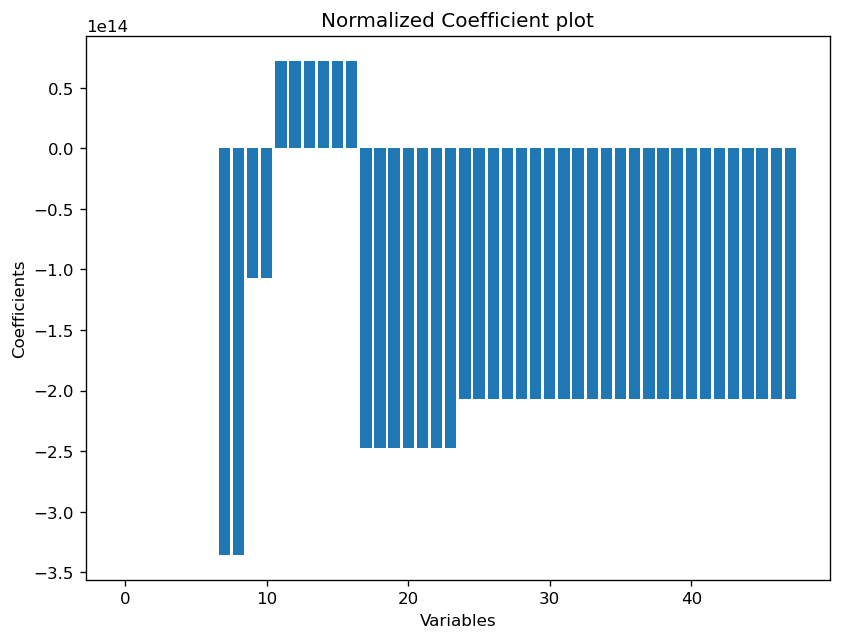

In [65]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x5.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

### Creating new subsets of data

In [66]:
#seperating independent and dependent variables
x = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']
x.shape, y.shape

((589827, 48), (589827,))

### Arranging coefficients with features

In [67]:
Coefficients = pd.DataFrame({
    'Variable'    : x.columns,
    'coefficient' : lr.coef_
})
Coefficients.head()

,Variable,coefficient
0,passenger_count,0.083804
1,pickup_longitude,-367.766507
2,pickup_latitude,211.366355
3,dropoff_longitude,-426.909015
4,dropoff_latitude,20.686472


### Chossing variables with sigificance greater than 0.5 ( Filtering Significant Features)

In [68]:
sig_var = Coefficients[Coefficients.coefficient > 0.5]

### Extracting the significant subset do independent Variables

In [69]:
subset = data[sig_var['Variable'].values]
subset.head()

,pickup_latitude,dropoff_latitude,distance,month_1,month_2,month_3,month_4,month_5,month_6
498628,40.758884,40.771729,1.427403,0,0,0,0,1,0
288589,40.790512,40.799870,1.124150,0,0,0,1,0,0
726002,40.737881,40.717117,2.531682,0,0,0,0,1,0
171668,40.701706,40.734188,3.703159,0,0,0,0,1,0
140184,40.777870,40.770100,1.019526,1,0,0,0,0,0


### Splitting the data into train set and the test set

In [70]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset, y , random_state = 56)

### Implementing Linear Regression

In [71]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

### Training Model

In [72]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

### Predicting over the train set

In [73]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 215.31597814047063


### Predicting over the test set

In [74]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     215.22102375607804


### Plotting the coefficients

Text(0.5, 1.0, 'Normalized Coefficient plot')

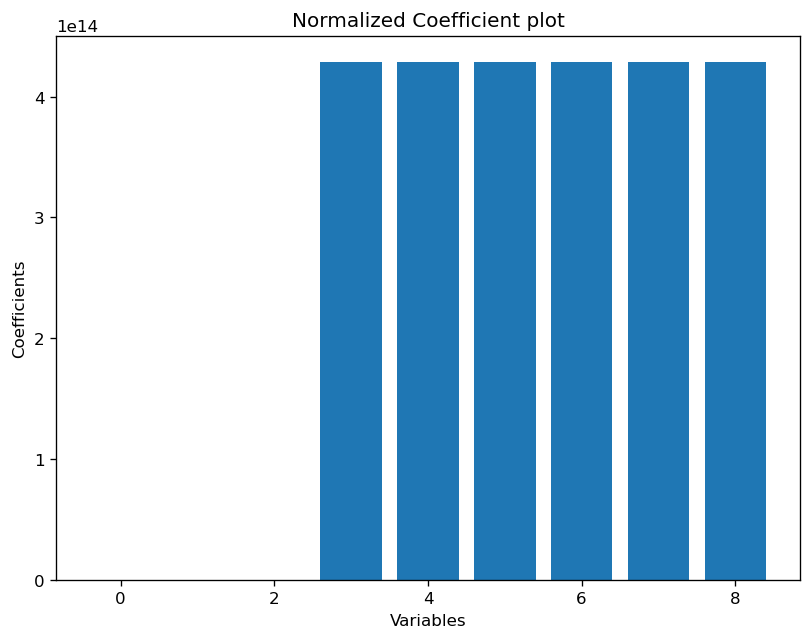

In [75]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

## Linear Regression with Regularization

In [76]:
# separating independent and dependent variables
x5 = data.drop(['trip_duration'], axis =1)
y5 = data['trip_duration']
x5.shape, y5.shape

((589827, 48), (589827,))

In [77]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x5, test_x5, train_y5, test_y5 = train_test_split(x5, y5, random_state = 65)

In [78]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as Mae

In [79]:
# Creating instance of Linear Regression
lin_reg = LR(normalize = True)

# Fitting the model
lin_reg.fit(train_x5, train_y5)


LinearRegression(normalize=True)

In [80]:
# Predicting over the train set and calculating the errors
train_pred = lin_reg.predict(train_x5)
k1 = Mae(train_pred, train_y5)
print('Training Mean Absolute Error is- ', k1)

Training Mean Absolute Error is-  106.32323196645342


In [81]:
# Predicting over the test set and calculating the errors
test_pred = lin_reg.predict(test_x5)
k1 = Mae(test_pred, test_y5)

print('Test Mean Absolute Error is- ', k1)


Test Mean Absolute Error is-  106.21030876797981


### Parameters of Linear Regression


In [82]:
lin_reg.coef_

array([ 8.38042999e-02, -3.67766507e+02,  2.11366355e+02, -4.26909015e+02,
        2.06864723e+01,  2.19480572e+02, -4.51807026e+01, -3.35746951e+14,
       -3.35746951e+14, -1.06896510e+14, -1.06896510e+14,  7.22817966e+13,
        7.22817966e+13,  7.22817966e+13,  7.22817966e+13,  7.22817966e+13,
        7.22817966e+13, -2.47132514e+14, -2.47132514e+14, -2.47132514e+14,
       -2.47132514e+14, -2.47132514e+14, -2.47132514e+14, -2.47132514e+14,
       -2.06815683e+14, -2.06815683e+14, -2.06815683e+14, -2.06815683e+14,
       -2.06815683e+14, -2.06815683e+14, -2.06815683e+14, -2.06815683e+14,
       -2.06815683e+14, -2.06815683e+14, -2.06815683e+14, -2.06815683e+14,
       -2.06815683e+14, -2.06815683e+14, -2.06815683e+14, -2.06815683e+14,
       -2.06815683e+14, -2.06815683e+14, -2.06815683e+14, -2.06815683e+14,
       -2.06815683e+14, -2.06815683e+14, -2.06815683e+14, -2.06815683e+14])

In [83]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y5,
    'predicted values' : test_pred,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
169622,1232,1024.125,207.875
481263,611,627.500,-16.500
398264,756,781.750,-25.750
443465,493,650.750,-157.750
519950,371,559.000,-188.000


In [84]:
 # Importing Ridge from sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [85]:
# Creating Ridge Regression with alpha values
reg_cv = RidgeCV(alphas = [0.1, 0.5, 1.0, 10.0])

In [86]:
# Fitting the model into ridge cv
model_cv = reg_cv.fit(x5, y5)

In [87]:
# Finding the best value of alpha
model_cv.alpha_

0.5

In [88]:
# Selecting alpha=0.5 for ridge regression
rid_reg = Ridge(alpha = 0.5)


In [89]:
# fitting the model on the training set
rid_reg.fit(train_x5,train_y5)


Ridge(alpha=0.5)

In [90]:
# Prediction on the training set
pred_reg_train = rid_reg.predict(train_x5)
linear_train = Mae(train_y5, pred_reg_train)
linear_train

106.32839094330691

In [91]:
Linear_training = 1 - (linear_train/mean_error)
Linear_training


0.648997645476918

In [92]:
# Prediction on the test set
pred_reg_test = rid_reg.predict(test_x5)
linear_test = Mae(test_y5, pred_reg_test)
linear_test


106.21536270290275

In [93]:
Linear_testing = 1 - (linear_test/mean_error)
Linear_testing

0.6493707648118152

#  End of Linear Model

# Decision Tree Model

In [94]:
# Shuffling the dataset
from sklearn.utils import shuffle
data = shuffle(data, random_state = 42)

In [95]:
#Separating the independent and dependent variables
x2 = data.drop(['trip_duration'], axis = 1)
y2 = data['trip_duration']

In [96]:
#Importing library and creating the train and test set
from sklearn.model_selection import train_test_split
train_x6, test_x6, train_y6, test_y6 = train_test_split(x2, y2, random_state = 101, test_size = 0.20)


In [97]:
#Creating the train and validation set
train_x7, valid_x6, train_y7, valid_y6 = train_test_split(train_x6, train_y6, random_state = 101, test_size = 0.20)


In [98]:
 #Importing Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dec_mod = DecisionTreeRegressor(random_state = 10)


In [99]:
dec_mod.fit(train_x7, train_y7)

DecisionTreeRegressor(random_state=10)

In [100]:
# Checking the train score
dec_mod.score(train_x7, train_y7)

1.0

In [101]:
# Checking the validation score
dec_mod.score(valid_x6, valid_y6)

0.9998154576347797

We noticed that both train and validation have a good score and we need to check
whether there’s overfitting and to interpret that how different properties influence the
tree. Next, interpreting accuracy relative to max depth

In [102]:
train_acc = []
validation_acc = []
for dep in range(1, 15):
    dec_mod = DecisionTreeRegressor(max_depth = dep, random_state=10)
    dec_mod.fit(train_x7, train_y7)
    train_acc.append(dec_mod.score(train_x7, train_y7))
    validation_acc.append(dec_mod.score(valid_x6, valid_y6))

In [103]:
 #Collecting this data into a dataframe
df = pd.DataFrame({'max_depth' : range(1, 15), 'tr_acc' : train_acc, 'valid_acc' : validation_acc})
df.head()

,max_depth,tr_acc,valid_acc
0,1,0.349974,0.342616
1,2,0.499061,0.494507
2,3,0.702598,0.700566
3,4,0.819605,0.816982
4,5,0.897586,0.895643


Text(0, 0.5, 'performance')

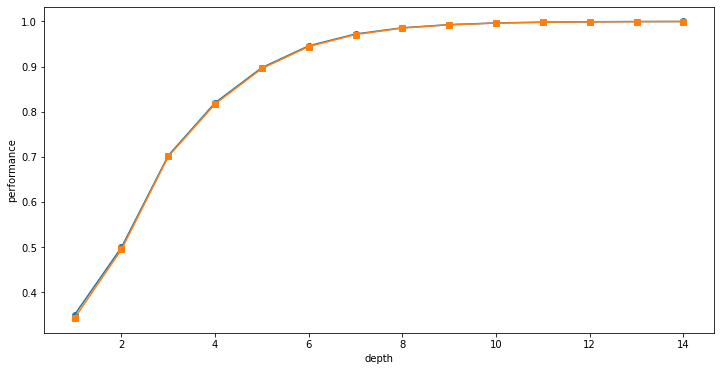

In [104]:
#Plotting maxdepth relative
plt.figure(figsize = (12, 6))
plt.plot(df['max_depth'], df['tr_acc'], marker = 'o')
plt.plot(df['max_depth'], df['valid_acc'], marker = 's')
plt.xlabel('depth')
plt.ylabel('performance')


The best Maximum Depth is at 9 while further plot is constant and overfitting might
be the reason for this.



In [105]:
# Creating a function for iterating over different max features and finding train and validation score
train_accura = []
validation_accura = []
for feat in range(1, 35):
    dec_mod = DecisionTreeRegressor(max_depth = 9, max_features = feat, min_samples_leaf = 1000, random_state = 10)
    dec_mod.fit(train_x7, train_y7)
    train_accura.append(dec_mod.score(train_x7, train_y7))
    validation_accura.append(dec_mod.score(valid_x6, valid_y6))

In [106]:
# Collecting the above data into a dataframe
df = pd.DataFrame({'max_features':range(1, 35), 'train_acc':train_accura, 'valid_acc':validation_accura})
df.head()

,max_features,train_acc,valid_acc
0,1,0.034124,0.031735
1,2,0.103191,0.100370
2,3,0.458994,0.455700
3,4,0.360500,0.354090
4,5,0.213383,0.208936


Text(0, 0.5, 'Performance')

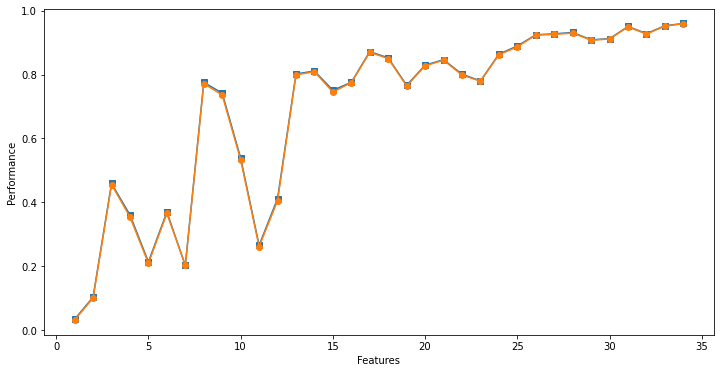

In [107]:
#Plotting the max features according to the model score
plt.figure(figsize =(12, 6))
plt.plot(df['max_features'], df['train_acc'], marker = 's')
plt.plot(df['max_features'], df['valid_acc'], marker = 'o')
plt.xlabel('Features')
plt.ylabel('Performance')

The best no. of feature from the plot is 31. Moving on selecting the max feature and
depth and finding train and test score.



In [108]:
DecisionTreeRegressor(max_depth = 9, max_features = 31, min_samples_leaf = 1000, random_state =10)

DecisionTreeRegressor(max_depth=9, max_features=31, min_samples_leaf=1000,
                      random_state=10)

In [109]:
# Fitting this model
dec_mod.fit(train_x7, train_y7)

DecisionTreeRegressor(max_depth=9, max_features=34, min_samples_leaf=1000,
                      random_state=10)

In [110]:
# Training Score
dec_train = dec_mod.score(train_x7, train_y7)
dec_train

0.9599354942785283

In [111]:
# Validation Score
dec_mod.score(valid_x6, valid_y6)

0.959302776510596

Finally, at last we see how this model performs on the test data

In [112]:
dec_test = dec_mod.score(test_x6, test_y6)
dec_test

0.9596925002373304

We get to see that the data didn’t overfit and a good test score is obtained.


### Drawing Decision Tree

In [113]:
from sklearn import tree

In [114]:
deci_tree = tree.export_graphviz(dec_mod, out_file = 'decision_tree.dot', feature_names = train_x6.columns, max_depth = 2, filled = True)


In [115]:
!dot -Tpng decision_tree.dot -o decision_tree.png

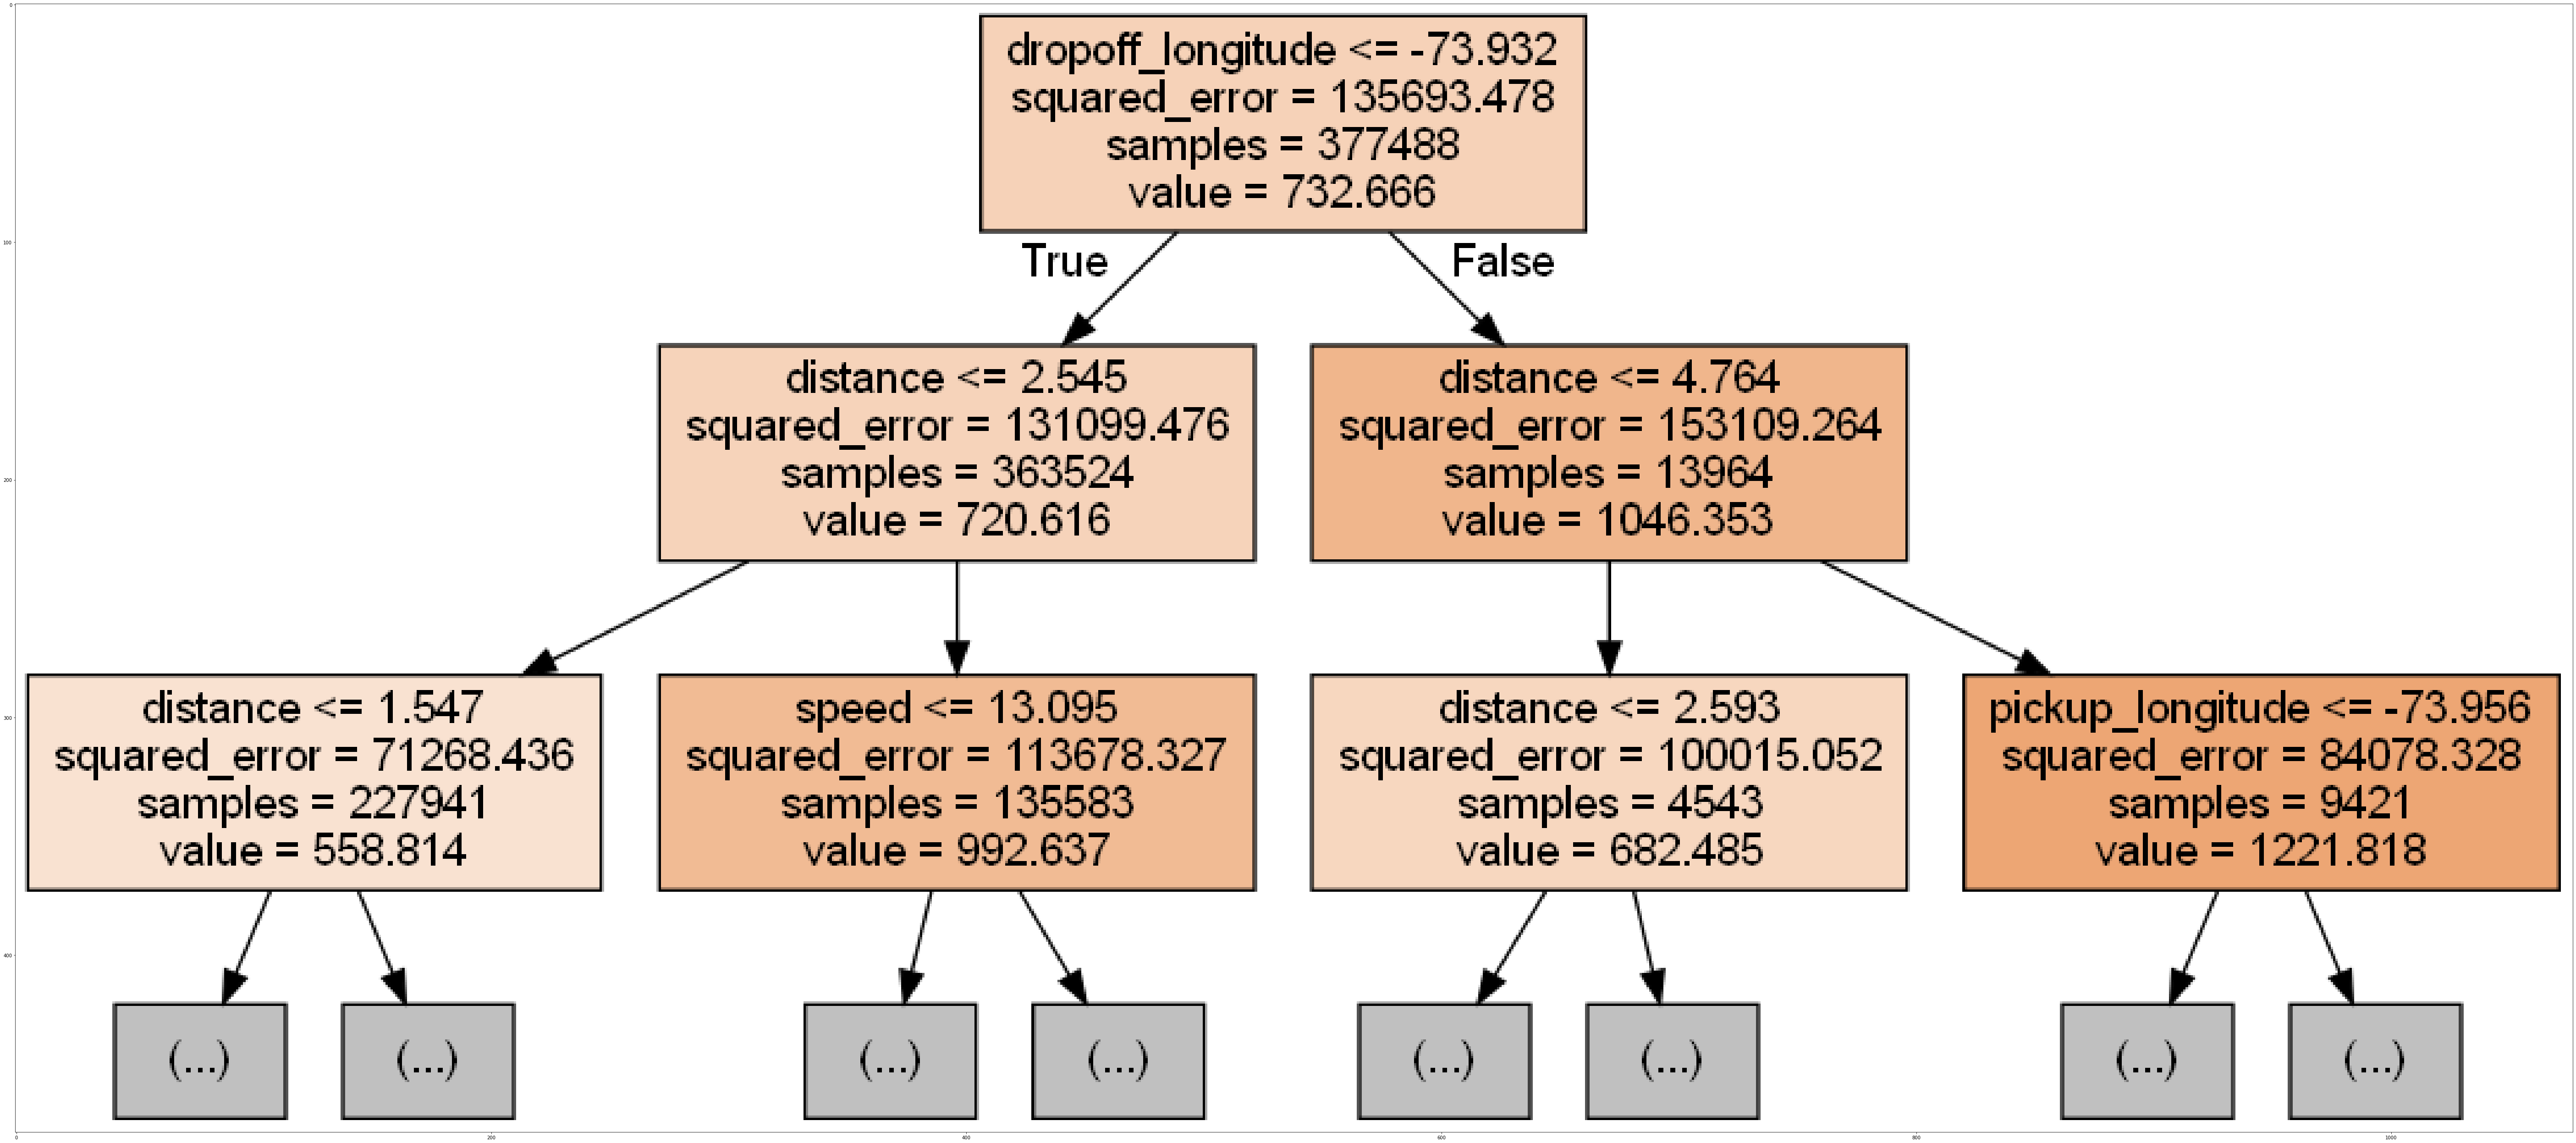

In [116]:
img = plt.imread('decision_tree.png')
plt.figure(figsize = (100, 100))
plt.imshow(img)

In the decision tree plot, we can see that the distance and speed variables takes
precedence and predictions that are accurate is based on these two.


# KNN Model

In [117]:
data.columns

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'distance',
       'speed', 'flag_N', 'flag_Y', 'vendor_id_1', 'vendor_id_2', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'day_number_0',
       'day_number_1', 'day_number_2', 'day_number_3', 'day_number_4',
       'day_number_5', 'day_number_6', 'pickup_hour_0', 'pickup_hour_1',
       'pickup_hour_2', 'pickup_hour_3', 'pickup_hour_4', 'pickup_hour_5',
       'pickup_hour_6', 'pickup_hour_7', 'pickup_hour_8', 'pickup_hour_9',
       'pickup_hour_10', 'pickup_hour_11', 'pickup_hour_12', 'pickup_hour_13',
       'pickup_hour_14', 'pickup_hour_15', 'pickup_hour_16', 'pickup_hour_17',
       'pickup_hour_18', 'pickup_hour_19', 'pickup_hour_20', 'pickup_hour_21',
       'pickup_hour_22', 'pickup_hour_23'],
      dtype='object')

In [118]:
# Separating dependent and independent variables
x = data.drop(['trip_duration'], axis =1)
y = data['trip_duration']


In [119]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x)


In [120]:
frame = pd.DataFrame(x_scale, columns= x.columns)

In [121]:
# Creating train and test sets
from sklearn.model_selection import train_test_split
train_x3, test_x3, train_y3, test_y3 = train_test_split(frame,y, random_state =65)


In [122]:
# Importing KNN Regressor and Evaluation Metric MAE
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [123]:
# Creating instance of KNN
reg = KNN(n_neighbors = 8)

# Fitting the model
reg.fit(train_x5, train_y5)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x5)
k = mse(test_predict, test_y5)
print('Test MSE    ', k )

In [124]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x5, train_y5)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x5)
        tmp = mse(tmp,test_y5)
        test_mse.append(tmp)
    
    return test_mse

In [125]:
# Defining K range
k = range(1,40)

In [126]:
# calling above defined function
test = Elbow(k)
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

### Comparing Models

In [127]:
compare = {'type':['train','test','train','test'],
'model': ['linear','linear','decision_tree','decision_tree'],
'score': [Linear_training, Linear_testing,dec_train,dec_test]
}
df = pd.DataFrame(compare)

<AxesSubplot:xlabel='model', ylabel='score'>

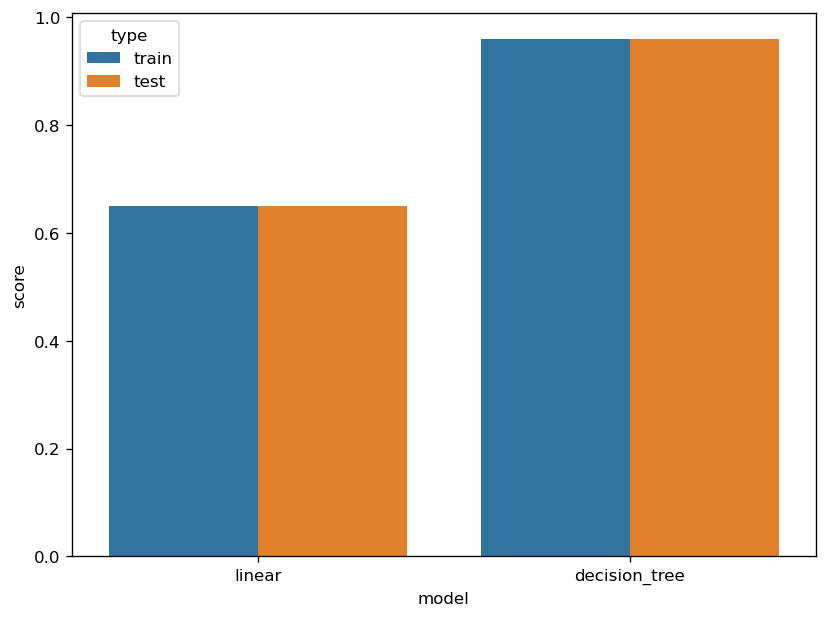

In [128]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
sns.barplot(data = df,x = 'model' ,y = 'score',hue = 'type',ci = None )

    Looking at the plot, it is clear that the Decision tree is giving best output for prediction of data.